# Introductory applied machine learning (INFR10069)

<div align="right"><font color="blue" size="5">Your Score was 53.0 out of a total of 111.0, or 47.7%</font></div>

# Assignment 2: Linear regression

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "02_LinearRegression.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="02_LinearRegression.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "02_LinearRegression.ipynb"
```

**N.B.: This is still Coursework 1 (cw1)**

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignment.

In [1]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:

import os
# import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold, cross_val_predict
# from sklearn.metrics import accuracy_score
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import confusion_matrix

# from utils.plotter import scatter_jitter, plot_confusion_matrix

/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: 

1. The specification of an automobile in terms of various characteristics 

1. Assigned insurance risk rating 
   * this rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

1. Normalized losses in use as compared to other cars
  * the third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year (avg_loss/car/year). 


To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.


## 1. Data Visualisation

Before jumping into our problem, it is beneficial to get a feel for the data we are dealing with in the rest of the assignment.

<a id='question_1_1'></a>
### ========== Question 1.1 --- [8 marks] ==========

Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Using any suitable pandas functionality, 
1. [Code] summarise *and*
1. [Text] comment upon

the key features of the data. Show all your code!

<div align="right"><font color="blue" size="4">6.0/8.0</font></div>

In [2]:
auto_numeric = pd.read_csv(os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv'))   # load the dataset

display(auto_numeric.head(10))

auto_numeric.info()                                                                           # displays info on dataset

auto_numeric.describe()                                                                       # summary statistics of data

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
0,164.0,99.8,176.6,66.2,54.3,8.85,3.19,3.40,10.0,102000.0,5500.0,24.0,30.0,40.52,57.68,13950.0
1,110.0,99.4,162.4,66.4,54.3,15.18,3.19,3.40,8.0,115000.0,5500.0,18.0,22.0,47.39,59.59,17450.0
2,158.0,105.8,192.7,71.4,51.6,15.18,3.94,2.80,8.5,70000.0,4400.0,28.0,30.0,0.85,3344.79,17710.0
3,106.0,86.6,158.7,67.7,55.9,13.74,3.13,3.50,7.8,140000.0,5600.0,32.0,20.0,44.74,68.97,23875.0
4,192.0,101.2,176.8,64.8,54.3,8.67,3.50,2.80,8.8,101000.0,5800.0,23.0,29.0,44.78,53.48,16430.0
5,194.0,110.0,190.9,71.4,58.7,8.67,3.78,3.90,22.5,101000.0,6000.0,47.0,53.0,1.80,1330.28,16925.0
6,188.0,101.2,176.8,64.8,54.3,26.58,3.31,3.19,9.0,121000.0,4250.0,21.0,28.0,7.19,377.06,20970.0
7,150.0,101.2,176.8,64.8,56.1,26.58,3.03,3.19,8.0,134000.0,4400.0,28.0,37.0,57.37,48.20,21105.0
8,121.0,88.4,141.1,60.3,53.2,3.39,3.03,3.03,9.5,48000.0,5300.0,47.0,53.0,59.33,25.08,5151.0
9,98.0,104.3,155.9,68.3,52.0,6.05,3.31,3.47,7.8,70000.0,5000.0,34.0,34.0,51.55,36.35,6295.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
normalized-losses          159 non-null float64
wheel-base                 159 non-null float64
length                     159 non-null float64
width                      159 non-null float64
height                     159 non-null float64
engine-size                159 non-null float64
bore                       159 non-null float64
stroke                     159 non-null float64
compression-ratio          159 non-null float64
engine-power               159 non-null float64
peak-rpm                   159 non-null float64
city-mpg                   159 non-null float64
highway-mpg                159 non-null float64
mean-effective-pressure    159 non-null float64
torque                     159 non-null float64
price                      159 non-null float64
dtypes: float64(16)
memory usage: 20.0 KB


,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


<div align="right"><font color="blue" size="4">4.0</font></div>

The dytpe is float64 and the memory usage is 20KB. There are 159 entries and 16 columns. The data overall shows different cars with their respective attributes. From looking at the standard deviation of the price of the cars, we can see that there is a large spread for the price range which can suggest a whole range of different values for attributes. Thc columns are set to be non-null meaning that they can not be empty.

<div align="right"><font color="blue" size="4">2.0</font></div>

<div align="left"><font color="green" size="4">Missing:
Data-type
Is the data clean & free of anomalous data or extreme jumps in quantiles?</font></div>

### ========== Question 1.2 --- [18 marks] ==========

We will now examine the attributes in some detail. Familiarise yourself with the concept of Correlation Coefficients (start from the Lecture on Generalisation and Evaluation).

1. [Code] Analyse first the relationship between each attribute and price:
  1. Compute the correlation coefficient between each attribute and price, *and*
  1. Visualise the distribution of each attribute with price
1. [Text] Given the above, which attributes do you feel may be most useful in predicting the price? (mention at least 5). How did you reach this conclusion? *Hint: which is the more useful of the above tools?*
1. [Code] Now we will analyse the relationship between the attributes themselves. Use an appropriate pairwise visualisation tool to display graphically the relationship between each pair of attributes you selected in (2).
1. [Text] Do any attributes exhibit significant correlations between one-another? (restrict your analysis to useful attributes identified above)
1. [Text] Which attributes (give examples) would you consider removing if we wish to reduce the dimensionality of the problem and why?

<div align="right"><font color="blue" size="4">14.0/18.0</font></div>

Correlation Coefficent between each attribute and Price


highway-mpg               -0.438467
city-mpg                  -0.356790
mean-effective-pressure   -0.104860
peak-rpm                  -0.099345
normalized-losses          0.015368
torque                     0.101435
compression-ratio          0.125683
stroke                     0.127834
height                     0.139563
bore                       0.365207
wheel-base                 0.423511
engine-power               0.443969
length                     0.512883
width                      0.524326
engine-size                0.715125
price                      1.000000
Name: price, dtype: float64

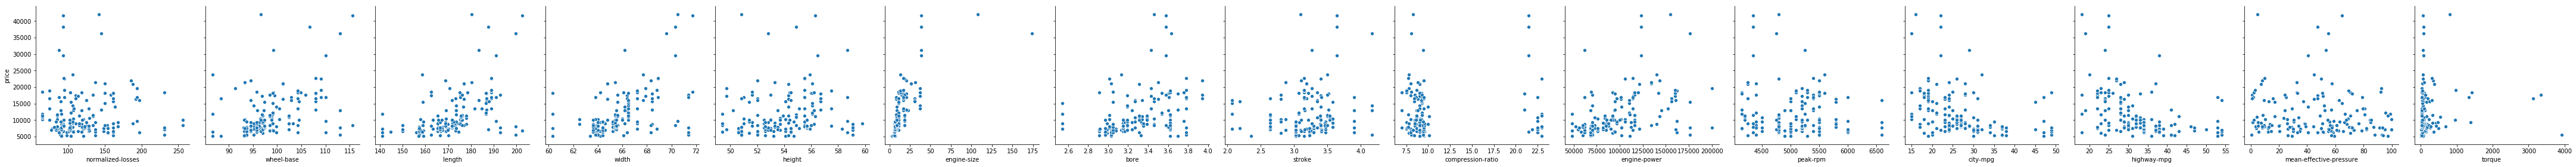

In [3]:
print("Correlation Coefficent between each attribute and Price")
corr_cof = auto_numeric.corr(method='pearson')['price']             # calculates correlation coefficient
display(corr_cof.sort_values())                                     # displays correlation coefficient

# plots the pairplot with respect to price
sns.pairplot(auto_numeric,x_vars=auto_numeric.columns.drop('price'), y_vars='price', height=4)

plt.show()

<div align="right"><font color="blue" size="4">5.0</font></div>

<div align="left"><font color="green" size="4">Your tiny scatterplots are unreadable.
It would be much more helpful to list the CC's of the attributes in CC value order.</font></div>

The top five attributes which are the most useful in predicting price is with their specific correlation (2dp) are :
- engine-size : 0.72
- width : 0.52
- length : 0.51
- engine-power : 0.44
- highway-mpg : -0.44
- wheel-base : 0.42

I would consider engine-size to be the most useful in prediciting price as it has a high positive correlation value which suggests higher engine-size the higher the price.

I would consider the rest to be somewhat useful as their correlation coefficients are low whichs means although there is a correlation, the other attributes won't be as useful compared too engine-size. 

<div align="right"><font color="blue" size="4">3.0</font></div>

<div align="left"><font color="green" size="4">Missing:
Why use the CC's, rather than your pairwise visualisations?
Bonus: +1 for observing that it the absolute value of correlation coefficient that matters for predictive power.</font></div>

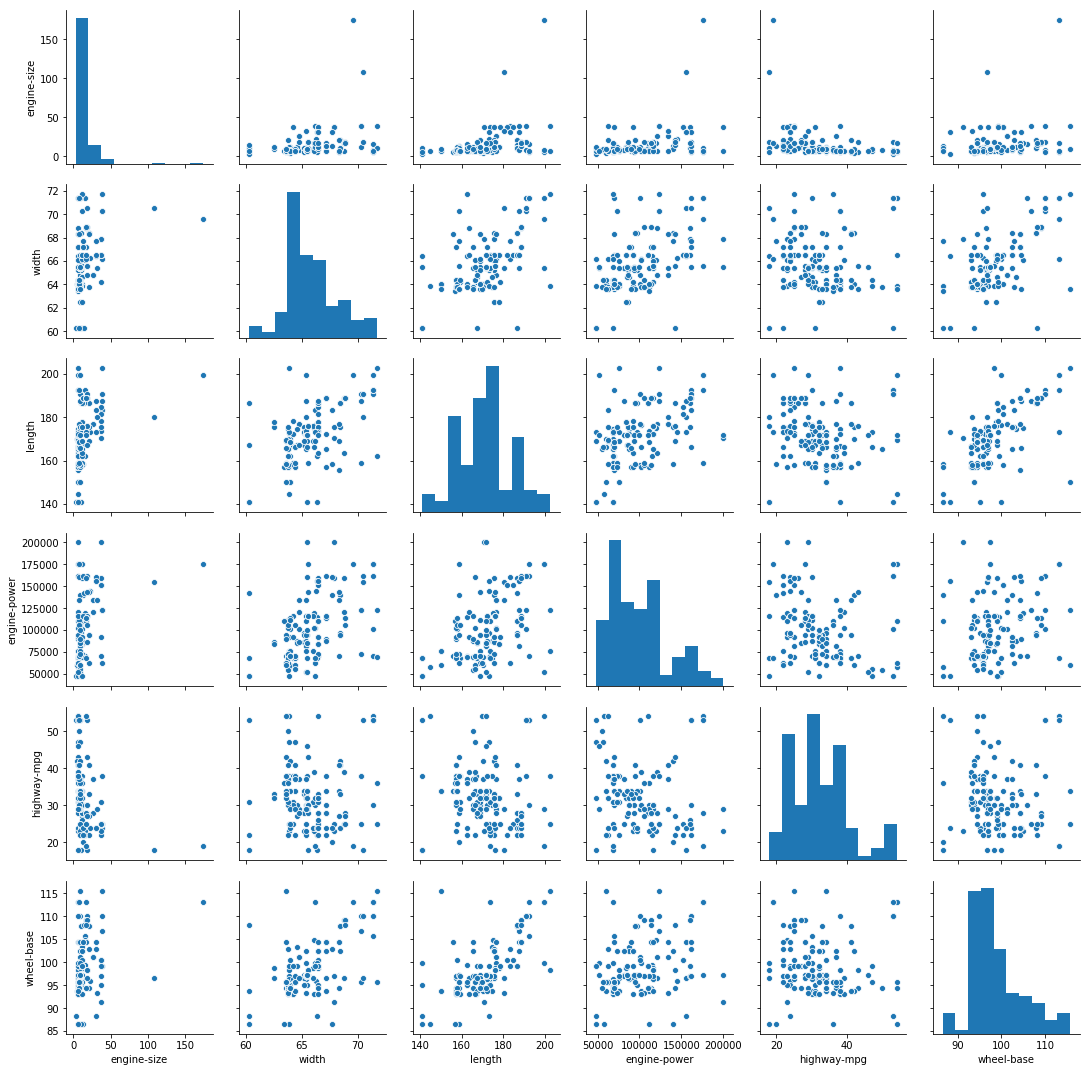

In [4]:
attr = ['engine-size','width', 'length','engine-power','highway-mpg','wheel-base']      # attributes

sns.pairplot(auto_numeric[attr])                                                        # plot pairplots with attributes

plt.show()

<div align="right"><font color="blue" size="4">2.0</font></div>

- 2 paris which are highly correlated is:
 - length and wheel-base
 - width and wheel-base

<div align="right"><font color="blue" size="4">2.0</font></div>

Attributes that can be removed to reduce dimeonsiality could be with respective correlations:
- mean-effective-pressure   -0.104860
- peak-rpm                  -0.099345
- normalized-losses          0.015368
- torque                     0.101435

This is because the correlation coefficients with respect to price is 'somewhat' close to 0 which suggests that there is not much correlation between these attributes and price. This means that they won't have a big effect as 'engine-size' on predicting price.

Arguably, a lot more attributes could be removed as I would say correlation coefficients from the range -0.3 to 0.3 would be considered weak correlations which means that potentially we can remove a lot more attributes due to the fact that the weak correlation suggests it would not be useful to predict price. This means that we could potenitally remove further 3 more.


<div align="right"><font color="blue" size="4">2.0</font></div>

<div align="left"><font color="green" size="4">You may also remove one out of any pair of attributes strongly correlated with each other</font></div>

## 2. Simple Linear Regression

When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. We will thus begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable, which we take to be the `engine-power`.

### ========== Question 2.1 --- [5 marks] ==========

1. [Code] Produce a scatter plot of `price` against `engine-power` (label the axis). 
1. [Text] What are your thoughts about the ability of the variable to predict the price?

<div align="right"><font color="blue" size="4">5.0/5.0</font></div>

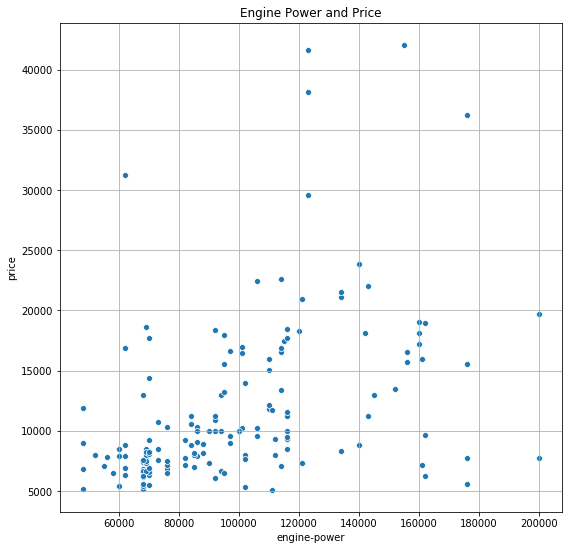

In [5]:
fig = plt.subplots(figsize=(9,9))                      

#plot the graph
sns.scatterplot(auto_numeric['engine-power'],auto_numeric['price'])  

# title and grid
plt.title('Engine Power and Price')
plt.grid(True)
plt.show()

<div align="right"><font color="blue" size="4">2.0</font></div>

By observing the graph we can see that there does seem to be a correlation between engine-power and price. However it does seem to be strongly correlated. It also does not seem to be very linear.

<div align="right"><font color="blue" size="4">3.0</font></div>

<div align="left"><font color="green" size="4">Bonus: +1 for sensible remarks about the questionble linearity of the correlation</font></div>

### ========== Question 2.2 --- [8 marks] ==========

1. [Code] Now visualise the distribution of the car price (again label the axes). Choose a sensible value for the number of bins in the histogram.
1. [Text] Comment on why the price variable *may not* be easy to model using linear regression, and suggest possible preprocessing to improve its applicability. At the same time, explain why it is not conclusive that it is the case at this stage. 
*N.B. There is no need to carry out the preprocessing at this stage, just comments*

<div align="right"><font color="blue" size="4">2.0/8.0</font></div>

/anaconda3/envs/py3iaml/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


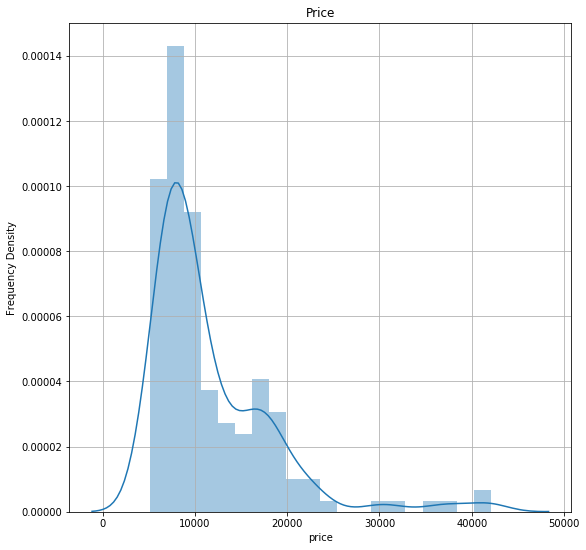

In [6]:
fig = plt.subplots(figsize=(9,9)) 

# plot the histogram
sns.distplot(auto_numeric['price'],bins=20)

# label and title
plt.title('Price')
plt.ylabel('Frequency Density')
plt.grid(True)
plt.show()

<div align="right"><font color="blue" size="4">2.0</font></div>

The price variable may not be easy to model using linear regression, this because there are a lot of variables to consider. If there is a variable which is skewed, then this may skew the price which can lead to inaccurcies.

We can use principle component analysis on the data. This will make the data more spread out.

<div align="right"><font color="blue" size="4">0.0</font></div>

<div align="left"><font color="green" size="4">The question asked was specifically about the properties of the distribution of the price variable, as seen above - but your answer was instead much more general, more vague, and more speculative.</font></div>

### ========== Question 2.3 --- [3 marks] ==========
We want to prepare our dataset for training/testing. Extract the dependent variable into a vector and the independent attribute into another. Split the dataset with 80% for training and the remaining 20% for testing, naming the resulting arrays `X_train`, `X_test`, `y_train` and `y_test`.

*Hint: you may use Scikit's `train_test_split`: set the random state to 0 for reproducibility*.

**N.B. For technical reasons, `X_train`/`X_test` must be 2D arrays: extend the dimensions of the independent attribute before splitting the dataset, such that the shape of the resulting array is (n,1) where n is the number of instances in the dataset**.

<div align="right"><font color="blue" size="4">3.0/3.0</font></div>

In [7]:
# turn data into vectors
X = auto_numeric['engine-power'].values.reshape(-1,1)
y = auto_numeric['price'].values.reshape(-1,1)

# seperating the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.20, random_state=0)

<div align="right"><font color="blue" size="4">3.0</font></div>

### ========== Question 2.4 --- [4 marks] ==========

Decide on a simple **baseline** to predict the `price` variable. Implement it and display its parameter.

*Hint: This should be just 1 line of code + a print/display*

<div align="right"><font color="blue" size="4">4.0/4.0</font></div>

In [8]:
#Default strategy is mean

from sklearn.dummy import DummyRegressor
baseline = DummyRegressor()
baseline.fit(X_train,y_train)
predict = baseline.predict(0)[0,0]
print('The baseline for the price is %.2f' % predict)

The baseline for the price is 11853.27


<div align="right"><font color="blue" size="4">4.0</font></div>

<a id='question_2_5'></a>
### ========== Question 2.5 --- [7 marks] ==========
Now we want to build a simple linear regression model. We will use Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html) class. 
1. [Code] Train a `LinearRegression` model and report its parameters.
1. [Text] Interpret the result, and comment on what impact this has *if any* on the relevance of the `engine-power` attribute to predict the `price`.

<div align="right"><font color="blue" size="4">5.0/7.0</font></div>

In [9]:
model = LinearRegression()
model.fit(X_train,y_train)
print('The linear regression model is as follows y = %.2fx + %.2f' % (model.coef_, model.intercept_))

The linear regression model is as follows y = 0.09x + 2823.12


<div align="right"><font color="blue" size="4">3.0</font></div>

- When the engine size is 0, this means the price of the car is 2823.12. With the coefficient being 0.09, this means for every time the engine-power goes up by one, the expected change is 0.09 in price.
- I think the relevance of engine-power to price is actally quite low considering the coefficent here is 0.09, this means that it doesn't really change price drastically. From this I think that engine-power does not have much relevance to predict price.

<div align="right"><font color="blue" size="4">2.0</font></div>

<div align="left"><font color="green" size="4">Because the regression coefficient represents the expected change in price for a one unit change in engine power, the magnitude of that coefficient is partly determined by the magnitude of the units being used - hence changing the scale can impact the coefficient. We therefore cannot judge the usefulness of the attribute from the coefficient.</font></div>

### ========== Question 2.6 --- [9 marks] ==========
Now we will evaluate and compare the performance of our models on the **testing** data.
1. [Code] Produce a scatter plot of the *test-data* price data-points. Add the regression line to the plot and show the predictions on the testing set by using a different marker. Finally plot also the baseline predictor (same figure). Label your axes and provide a [legend](https://matplotlib.org/2.2.3/api/legend_api.html).
1. [Text] Just by looking at this plot, how do the two models compare?

<div align="right"><font color="blue" size="4">0.0/9.0</font></div>

In [ ]:
fig = plt.subplots(figsize=(11,9)) 

# plot the actual test data
plt.scatter(X_test,y_test)

# plot the regression predictions and line
plt.scatter(X_test,model.predict(X_test))
plt.plot(np.arange(180000).reshape(-1,1),model.predict(np.arange(180000).reshape(-1,1)), 'k--')

# plot the baseline predictions and the line
plt.scatter(X_test,baseline.predict(X_test))
plt.plot(np.arange(180000).reshape(-1,1),baseline.predict(np.arange(180000).reshape(-1,1)),'c--')


# labels and title
plt.legend(['Regression Line','Baseline','Actual','Regression Predictions','Baseline Predictions'])
plt.title('Price and Engine-Power')
plt.grid(True)
plt.xlabel('Engine-power')
plt.ylabel('Price')
plt.show()

<div align="right"><font color="blue" size="4">0.0</font></div>

<div align="left"><font color="green" size="4">You are required to ensure that all cells have run with results showing before submitting</font></div>

From the graph we can see the regression line is a much better model than the baseline. The baseline is very much at a constant level while the regression line seems to be a bit more correlated with the data.

<div align="right"><font color="blue" size="4">0.0</font></div>

### ========== Question 2.7 --- [20 marks] ==========
 
You might have noticed that the above plot is not easy to interpret. 
1. [Code] Generate another plot, this time showing a histogram of the residuals under both models (label everything). 
1. [Code] Report also the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE) on the same **hold-out** testing set for both predictors. *Hint: Scikit Learn has functions to help in evaluating both measures.*
1. [Text] Comment on the result. *Hint: In your answer, you should discuss what the graph is showing and what the two values are measuring, and finally compare the two models under all measures/plots.*

<div align="right"><font color="blue" size="4">5.0/20.0</font></div>

In [ ]:
fig = plt.subplots(figsize=(12,9)) 

# calculate residuals
residual_dummy = y_test -  baseline.predict(X_test)
residual_reg = y_test - model.predict(X_test)

# plots the histogram
sns.distplot(residual_dummy, bins=20)
sns.distplot(residual_reg, bins=20)

# title and labels
plt.legend(['Baseline','Regression Line'])
plt.grid(True)
plt.xlabel('Error in Price')
plt.ylabel('Frequency Density')
plt.title('Residuals in Price')
plt.show()

<div align="right"><font color="blue" size="4">0.0</font></div>

In [ ]:
# calculate predicted data
baseline_predict = baseline.predict(X_test)
model_predict = model.predict(X_test)

# calculate coefficent of determination
score_base = r2_score(y_test,baseline_predict)
score_reg = r2_score(y_test,model_predict)

# calculate the root mean squared error
error_base = np.sqrt(mean_squared_error(y_test,baseline_predict))
error_reg = np.sqrt(mean_squared_error(y_test,model_predict))

# shows values 
print('The Coefficient of Determination for the Baseline is %.3f' % score_base)
print('The Coefficient of Determination for Regression is %.3f' % score_reg)
print('The Root Mean Squared Error for the baseline is %.3f' % error_base)
print('The Root Mean Squared Error for Regression is %.3f' % error_reg)

<div align="right"><font color="blue" size="4">0.0</font></div>

- The graph:
 -  shows the distrubution of the residuals of price in the two models
 - baseline distrubution shows a negatively skewed disturbution, this is because when looking at the line of best fit we see that most of the true values were actually less than the baseline.
 - regression distrubution shows a overall lower residual due to it being more correlated. However it is still a bit negatively skewed due to some of the true values being less than the baseline.
- Coefficients of Determination:
 - Regression: As the value is 0.169, it suggests that this model is not the best to represent the data as it shows the data isn't very close to the fitted regression line 
 - Baseline: As the value of -0.015 is close to 0, it suggests it is a constant model, which is what I would expect due to the baseline considering the mean
- Root Mean Squared Error:
 - Regression: As the value is 6153.704, it's value is lower than the baseline, at it was better at predicting, however the value was still very high
 - Baseline: As the valuee is 6800.704, it is a high value which means the model was not the best at predicting due to the residuals being high
 
 Overall looking at both graphs and values, I would say the regression classifier was better than the baseline clasifier

<div align="right"><font color="blue" size="4">5.0</font></div>

<div align="left"><font color="green" size="4">Explain why the baseline R^2 is not exactly zero, which literally corresponds to the prediction of the mean.
This question requires both *explanations* of the graph/measures *in general*, AND *interpretations* of the results they show *in particular"
Missing:
Explanation of R^2
Explanation of RMSE
You show the LR model did better, and your comparisons are sensible - but given the comparison was to a naive mean predictor, was it really enough of an improvement to matter?</font></div>

<a id='question_2_8'></a>
### ========== Question 2.8 --- [9 marks] ==========

So far we have used a hold-out test set for validation.

1. [Text] What are the repurcussions of this for interpreting the above results?

1. [Code] To solve this problem, we will use k-fold cross-validation to evaluate the performance of the regression model. By using Scikit-learn's [`KFold`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html) class construct a 5-fold cross-validation object. Set `shuffle=True` and `random_state=0`. ***[Optional]*** *You may wish to visualise the training/validation indices per fold. The `split` method comes in handy in this case.*

  **N.B. You will use this KFold instance you are about to create throughout most of the remainder of this Assignment - keep track of it!**

1. [Code] Then train a new Linear Regression Model using the [`cross_val_predict`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.cross_val_predict.html) function. Report the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE).

1. [Text] Relate these to the previous results.



<div align="right"><font color="blue" size="4">4.0/9.0</font></div>

Repurcussions include causing overfitting where the classifier works well for the training data but not well for the test data. This means that the classifier works well for data such as the training data which is very specific but not for the test data which may be more generalized.



<div align="right"><font color="blue" size="4">1.0</font></div>

<div align="left"><font color="green" size="4">The problem here is more with the test set than the training set; In the end, the purpose of a Machine Learning model is to be turned to real world applications; not just its test set. But even supposing the model *isn't* overfitted, the test set is tiny and may not be representative.</font></div>

In [ ]:
# cross validation
k_cross = KFold(n_splits=5, shuffle=True, random_state=0)

<div align="right"><font color="blue" size="4">2.0</font></div>

In [ ]:
new_reg = LinearRegression()
c = cross_val_predict(new_reg ,X, y, cv=k_cross)

fig = plt.subplots(figsize=(11,8)) 


# cross validation
plt.scatter(X,c,color = 'green')

# actual
plt.scatter(X,y, color = 'orange')

# plot the regression predictions and line
plt.scatter(X_test,model.predict(X_test), color ='red')
plt.plot(np.arange(180000).reshape(-1,1),model.predict(np.arange(180000).reshape(-1,1)), 'b--')

# calculate the coefficient of determination and RMSE
score = r2_score(y,c)
error = np.sqrt(mean_squared_error(y,c))

# labels and title
plt.legend(['Regression line','Cross Validation','Actual','Regression Predictions'])
plt.title('Price and Engine-Power with Cross Validation')
plt.grid(True)
plt.xlabel('Engine-power')
plt.ylabel('Price')
plt.show()

# prints out coefficient of determination and RMSE values
print('The Coefficient of Determination for the cross validation is %.3f' % score)
print('The Root Mean Squared Error for the cross validation is %.3f' % error)

<div align="right"><font color="blue" size="4">1.0</font></div>

<div align="left"><font color="green" size="4">You are required to ensure that all cells have run with results showing before submitting</font></div>

- The coefficent of determination is 0.173, this is actually higher than the regression line which suggests using this model is a lot better at fitting and representing the data
- The root mean square error is 6114.452 which means it is a high value. This the model was not the best at predicting due to the residuals being high. It has a similar RMSE to the regression line.


Overall Cross Validation that just predicting from the regression line is a lot better as you are training the model with not just one piece of training data but a lot.

<div align="right"><font color="blue" size="4">0.0</font></div>

<div align="left"><font color="green" size="4">This misses the point. Remember, all this is doing is the same thing you did previously, but aggregating over 5 different train-test splits. The question to be asking here is not 'which model is more accurate?' (It's five more or less similar models), but 'do I increase the validity of my testing procedure by doing k-fold here, or was a single train-test split sufficient?' (the latter, really)</font></div>

### ========== Question 2.9 --- (LEVEL 11) --- [18 marks] ==========

1. [Code] Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the $R^2$ and RMSE metrics for this model (on testing set). 

1. [Code/Text] You should notice a significant change in performance. Where is this coming from? Use visualisation/analysis methods you have learnt to answer this question. Document your code and describe your analysis (via inline comments) as you progress. Your written answer should be just a short paragraph (1-3 sentences) describing your conclusion.

*Hint: you may find it easier to understand what is happening if you use a hold-out test-set rather than cross-validation in this case. Also, make use of pandas methods to help you.*

In [ ]:
# (2) Show any working code here...
# Your Code goes here:

(2) - Final Conclusion(s)
***Your answer goes here:***

## 3. Multivariate Linear Regression
In this Section we will fit a Multivariate Linear Regression model (still using [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html)) to the dataset: i.e. we will now train a model with **multiple** explanatory variables and ascertain how they affect our ability to predict the retail price of a car. 

**N.B. We will use the *KFold* instance you created in [Question 2.8](#question_2_8) to train & validate our models.**

### ========== Question 3.1 --- [6 marks] ==========

1. [Code] Train a Multi-Variate `LinearRegression` model on the original `auto_numeric` dataframe you loaded in [Question 1.1](#question_1_1), and evaluate it using the *KFold* instance you created in [Question 2.8](#question_2_8) (report RMSE and $R^2$). 
1. [Text] Comment on the result, and compare with the univariate linear regression model we trained previously ([Question 2.5](#question_2_5)).

<div align="right"><font color="blue" size="4">2.0/6.0</font></div>

In [ ]:
# Create a mutli-variate linear regression 
multi_reg = LinearRegression()

# create values
x_values = auto_numeric.drop('price',axis =1).values
y_price = auto_numeric['price'].values

# fit and predict using k_fold
multi_reg.fit(x_values,y_price)
preds = cross_val_predict(multi_reg, x_values, y_price, cv=k_cross)

# calculate coefficent of determination and RMSE
score_multi = r2_score(y_price,preds)
error_multi = np.sqrt(mean_squared_error(y_price,preds))

# prints out coefficient of determination and RMSE values
print('The Coefficient of Determination for the cross validation is %.3f' % score_multi)
print('The Root Mean Squared Error for the cross validation is %.3f' % error_multi)

<div align="right"><font color="blue" size="4">1.0</font></div>

<div align="left"><font color="green" size="4">You are required to ensure that all cells have run with results showing before submitting</font></div>

- The $r^2$ value is 0.486 which suggests this regression is a lot better at representing the data than the linear regression line as the $r^2$ value is a lot higher.
- The RMSE value here is a lot lower, which suggests the redsiduals for the multi-regression is a lot lower than for the linear one.

<div align="right"><font color="blue" size="4">1.0</font></div>

<div align="left"><font color="green" size="4">What does this tell us about the other features?</font></div>

### ========== Question 3.2 --- [4 marks] ==========

1. [Code] Examine the scatter plot of `engine-size` vs `price` again (plot again below)
1. [Text] Why might this cause a problem for linear regression? 

<div align="right"><font color="blue" size="4">1.0/4.0</font></div>

In [ ]:
fig = plt.subplots(figsize=(11,7)) 

ax = sns.scatterplot(auto_numeric['engine-size'], auto_numeric['price'],color='b')

ax.grid(True)
ax.set_title('Engine-size and Price')

plt.show()

<div align="right"><font color="blue" size="4">0.0</font></div>

- A large proportion of the engine-sizes we see above is in the range between 0-50, this means from 50 onwards there is a lower representation meaning using a regression line for anything above 50 may lead to inaccuracies as we could consider the 2 points out of this range to be outliers

<div align="right"><font color="blue" size="4">1.0</font></div>

<div align="left"><font color="green" size="4">Overall, engine size is skewed with respect to price, and the extreme values we see certainly contribute to that; but we have no reason to suppose they are outliers.</font></div>

<a id='question_3_3'></a>
### ========== Question 3.3 --- [10 marks] ==========
In class we discussed ways of preprocessing features to improve performance in such cases.
1. [Code] Transform the `engine-size` attribute using an appropriate technique from the lectures (document it in your code) and show the transformed data (scatter plot).
1. [Code] Then retrain a LinearRegression Model and report $R^2$ and RMSE. 
1. [Text] How has the performance of the model changed when compared to the previous result? and why so significantly?

<div align="right"><font color="blue" size="4">2.0/10.0</font></div>

In [ ]:
fig = plt.subplots(figsize=(11,7)) 

copy = auto_numeric.copy()

copy['engine-size'] = copy['engine-size'].apply(np.log)

ax = sns.scatterplot(copy['engine-size'], auto_numeric['price'],color='b')

ax.grid()
ax.set_title('Engine-size and Price')

plt.show()

<div align="right"><font color="blue" size="4">0.0</font></div>

<div align="left"><font color="green" size="4">You are required to ensure that all cells have run with results showing before submitting</font></div>

In [ ]:
multi_reg_ln = LinearRegression()

# create values
x_values_ln = copy.drop('price',axis =1).values
y_price_ln = copy['price'].values

# fit and predict using k_fold
multi_reg_ln.fit(x_values_ln,y_price_ln)
#preds_ln = multi_reg_ln.predict(x_values_ln)
preds_ln = cross_val_predict(multi_reg_ln, x_values_ln, y_price_ln, cv=k_cross)

# calculate coefficent of determination and RMSE
score_multi_ln = r2_score(y_price_ln,preds_ln)
error_multi_ln = np.sqrt(mean_squared_error(y_price_ln,preds_ln))

# prints out coefficient of determination and RMSE values
print('The Coefficient of Determination for the cross validation is %.3f' % score_multi_ln)
print('The Root Mean Squared Error for the cross validation is %.3f' % error_multi_ln)

<div align="right"><font color="blue" size="4">1.0</font></div>

- The $r^2$ value is high which suggests that this is a lot better at representing the data and model. The root mean squared error is also a lot lower which means the residuals are alot better. 
- This could be because actually applying the log function gives us a better spread of the data.

<div align="right"><font color="blue" size="4">1.0</font></div>

<div align="left"><font color="green" size="4">More analysis than this is really wanted. It isn't enough to state that, after making one change performance improved, probably because of the change that was made:
* The relationship between log(e.s.) and price is more linear
* For this to have had so big an effect, e.s. must have been an important predictor already.</font></div>

### ========== Question 3.4 --- (LEVEL 11) --- [12 marks] ==========

The simplicity of Linear Regression allows us to interpret the importance of certain features in predicting target variables. However this is not as straightforward as just reading off the coefficients of each of the attributes and ranking them in order of magnitude.

1. [Text] Why is this? How can we *linearly* preprocess the attributes to allow for a comparison? Justify your answer.
1. [Code] Perform the preprocessing you just mentioned on the transformed data-set from [Question 3.3](#question_3_3), retrain the Linear-Regressor and report the coefficients in a readable manner. *Tip: To simplify matters, you may abuse standard practice and train the model once on the entire data-set with no validation/test set.*
1. [Text] Which are the three (3) most important features for predicting price under this model?

(1) ***Your answer goes here:***

In [ ]:
# (2) # Your Code goes here:

(3) ***Your answer goes here:***

### ========== Question 3.5 --- (LEVEL 11) --- [10 marks] ==========

In the lectures we discussed another form of extension to the basic linear-regression model: the introduction of basis functions. This method attempts to capture non-linearities in the input-output mapping.

1. [Text] How would you choose the features to test higher-orders on? And how would you choose the best polynomial order for these features?
1. [Code] Load the csv file `train_auto_nonlinear.csv` into a new dataframe (this is a standard version of the transformed data-set from [Question 3.3](#question_3_3)). Add a second-order basis to the two attributes `length` and `engine-power` and train a new LinearRegression model. Report the $R^2$ and RMSE performance.
1. [Text] Comment on the result in relation to those in [Question 3.3](#question_3_3).

(1) ***Your answer goes here:***

In [ ]:
# (2) # Your Code goes here:

(3) ***Your answer goes here:***